In [1]:
# standard python libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# cellpose library for cell-like object segmentation
from cellpose import io
from cellpose import models
from cellpose.io import imread
from cellpose import plot, utils

In [3]:
# Control display of images
from IPython import display

In [4]:
# Used  to get the area of platelets
import scipy.spatial as ss

### cellpose

In [5]:
"""
Convert a RGB images into a greyscale images. We assume that the images follow linear RGB 
format. 
"""

def rgb2gray(rgb):
    
    rgb[0, :, :] = rgb[0, :, :] * 0.2989
    rgb[1, :, :] = rgb[1, :, :] * 0.5870
    rgb[2, :, :] = rgb[2, :, :] * 0.1140
    
    return np.sum(rgb, axis = 0)

In [5]:
model = models.Cellpose(model_type='cyto') 

In [6]:
# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='cyto')  # cyto: cellpose data vs cyto2: cellpose + user data

# list of files
# PUT PATH TO YOUR FILES HERE!


images = imread("20200908-Tirf-LXII-s5-v1-hPlt-20FNG-DMSO-woADP-BF-DIC-647Tirf-MBC370.3-561Tirf-PAC1-488Tirf-SZ22.tif") 
images = images[299, 3, :, :]


# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(images, diameter=40, channels=channels)

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:01<00:00, 870.45it/s]


In [7]:
io.masks_flows_to_seg(images, masks, flows, diams, '221008_model.npy', channels)

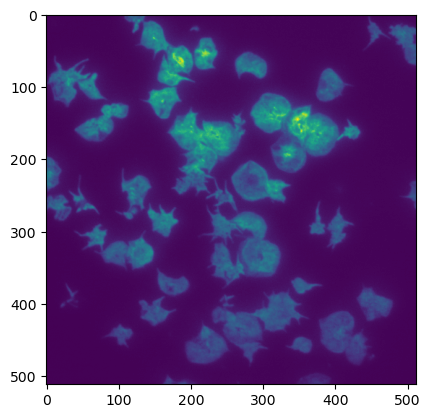

In [11]:
plt.imshow(dat['img'])

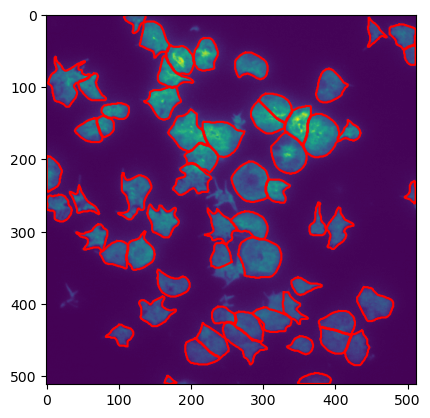

In [10]:
dat = np.load('221008_model_seg.npy', allow_pickle=True).item()

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(dat['img'])
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

In [7]:
# number of pixels for 1cm rougly
520/8.5

61.1764705882353

In [8]:
# diameter of platelet divided by length of each pixel (0.157)
2/0.157

12.738853503184714

In [9]:
520*0.157

81.64

In [8]:
# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(model_type='cyto')  # cyto: cellpose data vs cyto2: cellpose + user data

# list of files
# PUT PATH TO YOUR FILES HERE!


images = imread("20200908-Tirf-LXII-s6-v1-hPlt-20FNG-TGX221-woADP-BF-DIC-647Tirf-MBC370.3-561Tirf-PAC1-488Tirf-SZ22.tif") 
images = images[299, 3, :, :]


# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(images, diameter=40, channels=channels)

100%|████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:00<00:00, 2494.54it/s]


In [9]:
io.masks_flows_to_seg(images, masks, flows, diams, '221015_model.npy', channels)

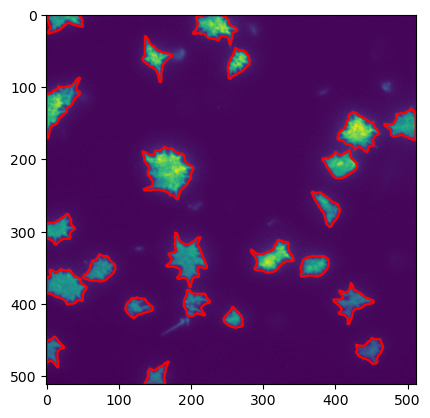

In [10]:
dat = np.load('221015_model_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'])

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(dat['img'])
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

### Create the target variables

In [4]:
dat = np.load('221015_model_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'])

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])

# Store classification of platelets in target
target2 = []

for o in outlines:
    plt.figure()
    plt.imshow(dat['img'])
    plt.plot(o[:,0], o[:,1], color='r')
    plt.show()
    
    classification = int(input())
    target2.append(classification)
    
    display.clear_output()

In [6]:
target2

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

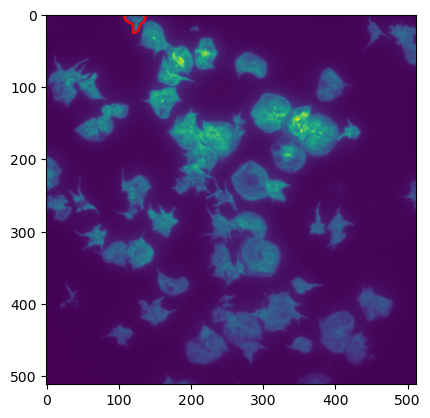

KeyboardInterrupt: Interrupted by user

In [10]:
dat = np.load('221008_model_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'])

# plot image with outlines overlaid in red
target = []
outlines = utils.outlines_list(dat['masks'])

for o in outlines:
    
    plt.figure()
    plt.imshow(dat['img'])
    plt.plot(o[:,0], o[:,1], color='r')
    plt.show()
    
    classification = int(input())
    target.append(classification)
    
    display.clear_output()

In [9]:
# 221008
print(target)

[2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [10]:
# 221015
print(target2)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [9]:
target1 = [2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [10]:
target2 = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [7]:
dat = np.load('221008_model_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'])

# plot image with outlines overlaid in red
target = []
outlines = utils.outlines_list(dat['masks'])


area1 = []

for points in outlines:
    hull = ss.ConvexHull(points)
    area1.append(hull.area)

In [8]:
len(area1)

61

In [5]:
dat = np.load('221015_model_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'])

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])

area2 = []

for points in outlines:
    hull = ss.ConvexHull(points)
    area2.append(hull.area)

In [6]:
len(area2)

23

In [14]:
df1 = pd.DataFrame({'area':area1, 'target': target1})

In [13]:
df2 = pd.DataFrame({'area':area2, 'target':target2})

In [17]:
df1['drug'] = 'DMSO'

In [16]:
df2['drug'] = 'TGX22'

In [18]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [19]:
df

,area,target,drug
0,88.960006,2,DMSO
1,106.750445,2,DMSO
2,142.830257,2,DMSO
3,115.143003,2,DMSO
4,127.840473,3,DMSO
...,...,...,...
79,102.869366,2,TGX22
80,85.269132,2,TGX22
81,107.049963,2,TGX22
82,114.684286,2,TGX22


### Machine Learning

In [36]:
from sklearn.svm import SVC

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['area'], df['target'], test_size = 0.20, stratify=df['target'])


In [60]:
y_train.value_counts()

2    56
3    11
Name: target, dtype: int64

In [61]:
y_test.value_counts()

2    14
3     3
Name: target, dtype: int64

In [62]:
X_train

19     84.534426
26    170.479965
38    129.645275
61    134.620293
37    140.223970
         ...    
52    174.922147
79    102.869366
66    141.831707
8     144.293948
48     94.792346
Name: area, Length: 67, dtype: float64

In [63]:
X_train = pd.DataFrame(X_train)

In [64]:
svclassifier = SVC(kernel='linear', class_weight='balanced')

svclassifier.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [65]:
X_test = pd.DataFrame(X_test)

In [66]:
y_pred = svclassifier.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  3]
 [ 2  1]]
              precision    recall  f1-score   support

           2       0.85      0.79      0.81        14
           3       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17



In [68]:
y_pred = svclassifier.predict(X_train)

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[33 23]
 [ 4  7]]
              precision    recall  f1-score   support

           2       0.89      0.59      0.71        56
           3       0.23      0.64      0.34        11

    accuracy                           0.60        67
   macro avg       0.56      0.61      0.53        67
weighted avg       0.78      0.60      0.65        67



In [11]:
14/84

0.16666666666666666

### EDA

In [28]:
df.groupby('target').mean()

,area
target,
2,130.705746
3,148.901570


In [30]:
(130.71+148.90)/2

139.805

In [31]:
df[df['area']>139.805]

,area,target,drug
2,142.830257,2,DMSO
8,144.293948,2,DMSO
9,200.300728,2,DMSO
12,148.244096,2,DMSO
14,140.478245,3,DMSO
16,146.226360,3,DMSO
17,172.086955,2,DMSO
18,173.687578,3,DMSO
22,170.820937,3,DMSO
23,164.029108,3,DMSO
